In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ax,figsize=(16,10)

In [46]:
data= pd.read_csv('C:/Users/AnupamaRatha/Desktop/Case Study/Credit Card Attrition Data.csv')

In [47]:
#create a copy of the data frame
df1=data.copy()

In [48]:
df1.isnull().sum()

CustomerID                        0
CardType                          0
Product                           0
Balance                           0
BalanceFrequency                  0
Purchases                         0
OneOffPurchases                   0
InstallmentPurchases              0
CashAdvance                       0
PurchaseFrequency                 0
OneOffPurchaseFrequency           0
PurchasesInstallmentsFrequency    0
CashAdvanceFrequency              0
CashAdvanceTransactions           0
PurchasesTransactions             0
CreditLimit                       0
Payments                          0
MinimumPayments                   0
PercentageFullPayment             0
Tenure                            0
Attrited                          0
dtype: int64

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

In [50]:
print("Number of rows: ", df1.shape[0])
counts = df1.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  8950


,Balance,BalanceFrequency,Purchases,OneOffPurchases,InstallmentPurchases,CashAdvance,PurchaseFrequency,OneOffPurchaseFrequency,PurchasesInstallmentsFrequency,CashAdvanceFrequency,CashAdvanceTransactions,PurchasesTransactions,CreditLimit,Payments,MinimumPayments,PercentageFullPayment,Tenure,Attrited
Count of values,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0


In [51]:
# Drop the columns that we have decided won't be used in prediction
df1 = df1.drop(["CustomerID","Tenure","Product","CardType"], axis=1)
features = df1.drop(["Attrited"], axis=1).columns

In [52]:
df1.head(10)

,Balance,BalanceFrequency,Purchases,OneOffPurchases,InstallmentPurchases,CashAdvance,PurchaseFrequency,OneOffPurchaseFrequency,PurchasesInstallmentsFrequency,CashAdvanceFrequency,CashAdvanceTransactions,PurchasesTransactions,CreditLimit,Payments,MinimumPayments,PercentageFullPayment,Attrited
0,409.0,0.82,954.0,0.0,954.0,0.0,0.17,0.00,0.08,0.00,0.0,2.0,10000.0,2018.0,1395.0,0.00,0.0
1,32025.0,0.91,0.0,0.0,0.0,64429.0,0.00,0.00,0.00,0.25,4.0,0.0,70000.0,41030.0,10723.0,0.22,0.0
2,24951.0,1.00,7732.0,7732.0,0.0,0.0,1.00,1.00,0.00,0.00,0.0,12.0,75000.0,6221.0,6273.0,0.00,0.0
3,16667.0,0.64,14990.0,14990.0,0.0,2058.0,0.08,0.08,0.00,0.08,1.0,1.0,75000.0,0.0,0.0,0.00,0.0
4,8177.0,1.00,160.0,160.0,0.0,0.0,0.08,0.08,0.00,0.00,0.0,1.0,12000.0,6783.0,2448.0,0.00,0.0
5,18098.0,1.00,13333.0,0.0,13333.0,0.0,0.67,0.00,0.58,0.00,0.0,8.0,18000.0,14001.0,24072.0,0.00,1.0
6,6273.0,1.00,70910.0,64026.0,6884.0,0.0,1.00,1.00,1.00,0.00,0.0,64.0,135000.0,63543.0,1981.0,1.00,0.0
7,18237.0,1.00,4362.0,0.0,4362.0,0.0,1.00,0.00,1.00,0.00,0.0,12.0,23000.0,6791.0,5320.0,0.00,0.0
8,10149.0,1.00,8615.0,6615.0,2000.0,0.0,0.33,0.08,0.25,0.00,0.0,5.0,70000.0,6883.0,3120.0,0.00,0.0
9,1522.0,0.55,12816.0,12816.0,0.0,0.0,0.17,0.17,0.00,0.00,0.0,3.0,110000.0,11648.0,1003.0,0.00,0.0


In [53]:
df_train, df_test = train_test_split(df1, test_size=0.20)

In [54]:
# Set up our RandomForestClassifier instance and fit to data
clf = RandomForestClassifier(n_estimators=30)
clf.fit(df_train[features], df_train["Attrited"])

# Make predictions
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
score = clf.score(df_test[features], df_test["Attrited"])
print("Accuracy: ", score)

Accuracy:  0.788268156424581


,Predicted False,Predicted True
Actual False,1406,16
Actual True,363,5


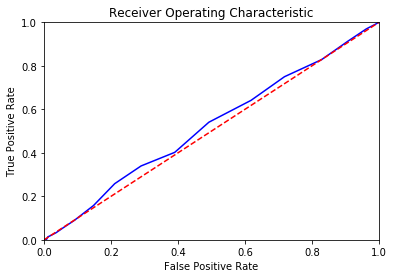

In [56]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["Attrited"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["Attrited"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
0,0.120915,Balance
14,0.116770,MinimumPayments
13,0.115424,Payments
2,0.085204,Purchases
12,0.083407,CreditLimit


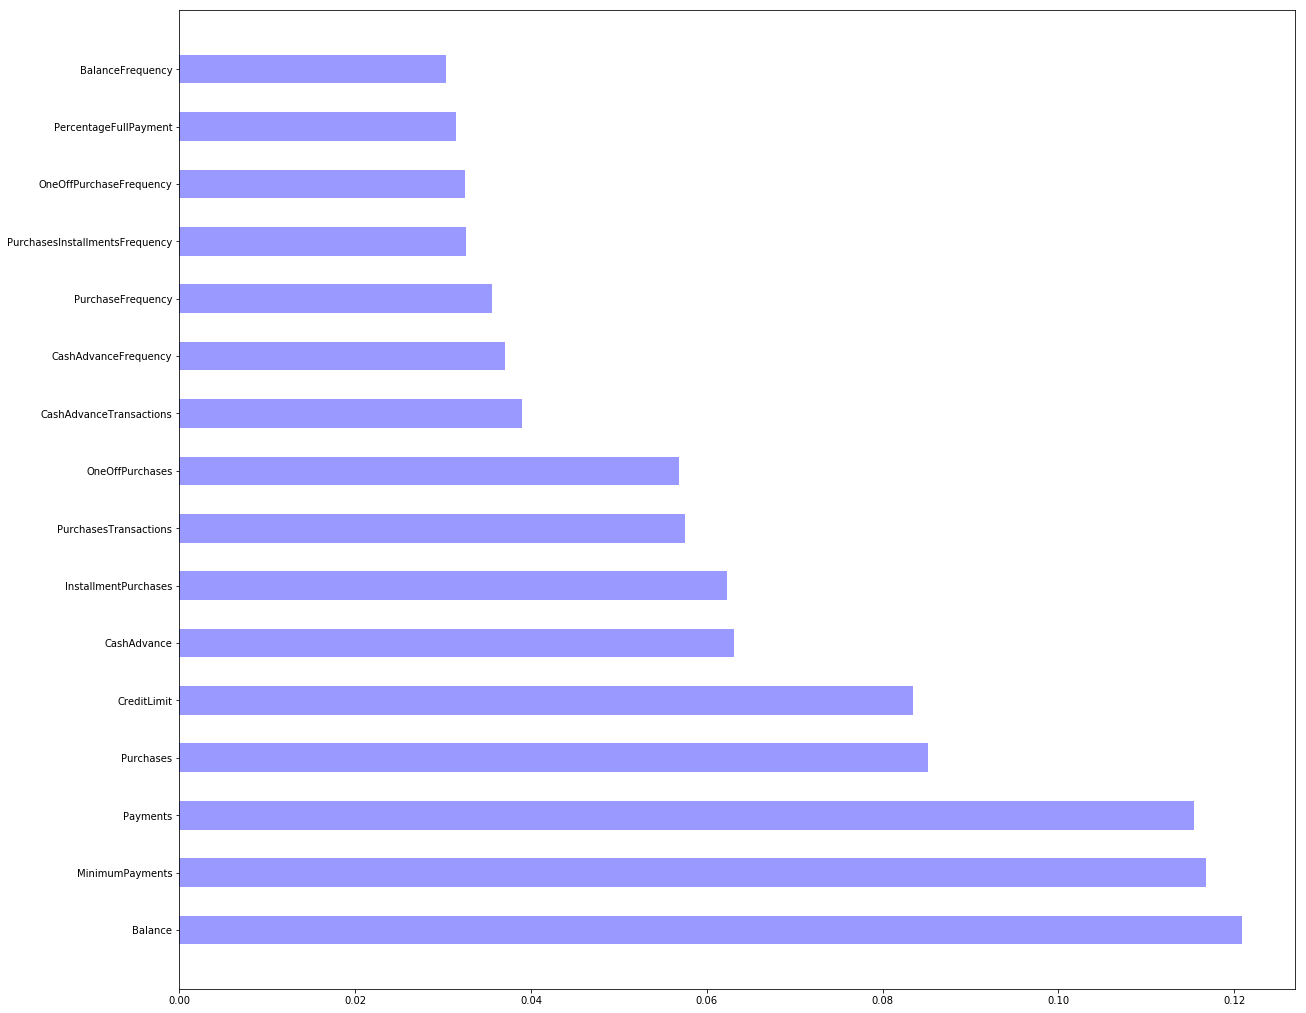

In [57]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [67]:
df_test["prob_true"] = probs[:, 1]
df_risky = df_test[df_test["prob_true"] >= 0.55]
display(df_risky.head(5)[["prob_true"]])

C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
4781,0.600000
2211,0.566667
3633,0.566667
8121,0.566667
1710,0.633333


____________________________________________________________________________ Logistices________________________

In [69]:
#create a copy of the data frame
df2=data.copy()

In [70]:
df2.columns.values

array(['CustomerID', 'CardType', 'Product', 'Balance', 'BalanceFrequency',
       'Purchases', 'OneOffPurchases', 'InstallmentPurchases',
       'CashAdvance', 'PurchaseFrequency', 'OneOffPurchaseFrequency',
       'PurchasesInstallmentsFrequency', 'CashAdvanceFrequency',
       'CashAdvanceTransactions', 'PurchasesTransactions', 'CreditLimit',
       'Payments', 'MinimumPayments', 'PercentageFullPayment', 'Tenure',
       'Attrited'], dtype=object)

In [71]:
# Checking the data types of all the columns
df2.dtypes

CustomerID                         object
CardType                           object
Product                            object
Balance                           float64
BalanceFrequency                  float64
Purchases                         float64
OneOffPurchases                   float64
InstallmentPurchases              float64
CashAdvance                       float64
PurchaseFrequency                 float64
OneOffPurchaseFrequency           float64
PurchasesInstallmentsFrequency    float64
CashAdvanceFrequency              float64
CashAdvanceTransactions           float64
PurchasesTransactions             float64
CreditLimit                       float64
Payments                          float64
MinimumPayments                   float64
PercentageFullPayment             float64
Tenure                            float64
Attrited                          float64
dtype: object

In [74]:
# Converting Total Charges to a numerical data type.
df2.TotalCharges = pd.to_numeric(df2.Product, errors='coerce')
df2.TotalCharges = pd.to_numeric(df2.CardType, errors='coerce')
df2.isnull().sum()

CustomerID                        0
CardType                          0
Product                           0
Balance                           0
BalanceFrequency                  0
Purchases                         0
OneOffPurchases                   0
InstallmentPurchases              0
CashAdvance                       0
PurchaseFrequency                 0
OneOffPurchaseFrequency           0
PurchasesInstallmentsFrequency    0
CashAdvanceFrequency              0
CashAdvanceTransactions           0
PurchasesTransactions             0
CreditLimit                       0
Payments                          0
MinimumPayments                   0
PercentageFullPayment             0
Tenure                            0
Attrited                          0
dtype: int64

In [75]:

#Remove customer IDs from the data set
df2 = df2.iloc[:,1:]
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,Balance,BalanceFrequency,Purchases,OneOffPurchases,InstallmentPurchases,CashAdvance,PurchaseFrequency,OneOffPurchaseFrequency,PurchasesInstallmentsFrequency,CashAdvanceFrequency,...,CardType_Rewards,CardType_Standard,CardType_Student Business,Product_Balance Transfer,Product_Cashback,Product_Gold,Product_Platinum,Product_Silver,Product_Student Business,Product_Travel
0,409.0,0.82,954.0,0.0,954.0,0.0,0.17,0.00,0.08,0.00,...,0,1,0,0,0,0,0,1,0,0
1,32025.0,0.91,0.0,0.0,0.0,64429.0,0.00,0.00,0.00,0.25,...,0,1,0,0,0,0,0,1,0,0
2,24951.0,1.00,7732.0,7732.0,0.0,0.0,1.00,1.00,0.00,0.00,...,0,1,0,0,0,0,0,1,0,0
3,16667.0,0.64,14990.0,14990.0,0.0,2058.0,0.08,0.08,0.00,0.08,...,0,1,0,0,0,0,0,1,0,0
4,8177.0,1.00,160.0,160.0,0.0,0.0,0.08,0.08,0.00,0.00,...,0,1,0,0,0,0,0,1,0,0


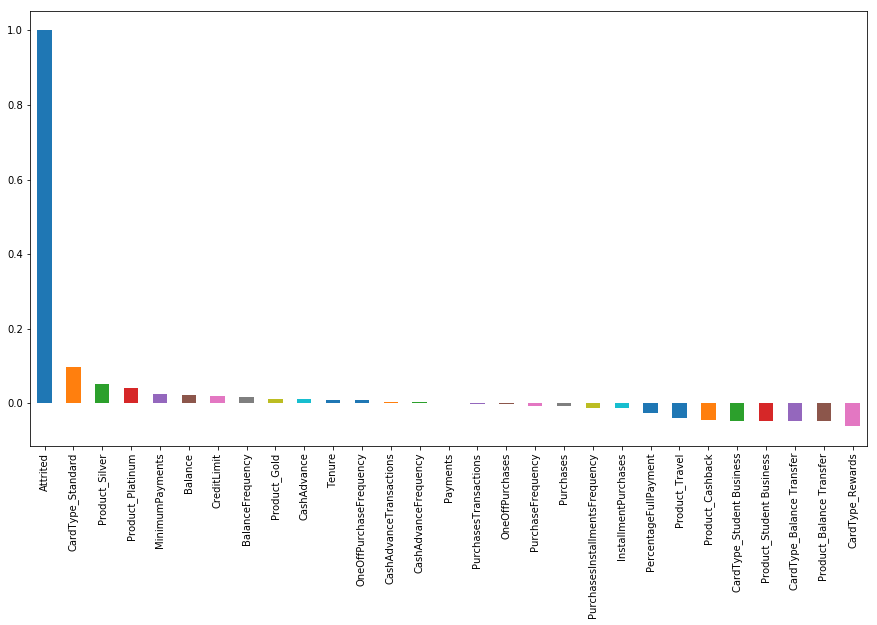

In [80]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Attrited'].sort_values(ascending = False).plot(kind='bar')

C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'# of Customers by their tenure')

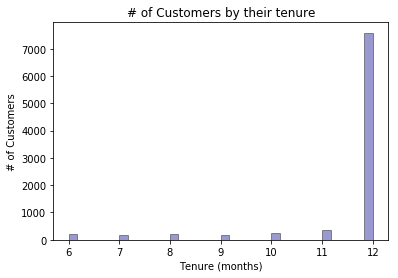

In [82]:
ax = sns.distplot(df2['Tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

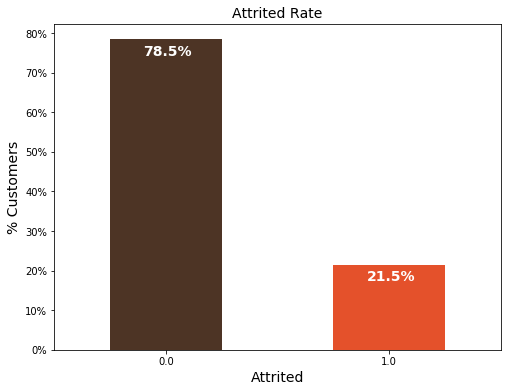

In [86]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
colors = ['#4D3425','#E4512B']
ax = (df2['Attrited'].value_counts()*100.0 /len(df2)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Attrited',size = 14)
ax.set_title('Attrited Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Credit Limit by churn')

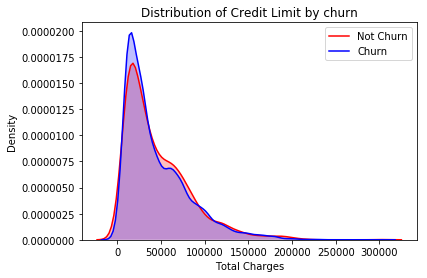

In [91]:
ax = sns.kdeplot(df2.CreditLimit[(df2["Attrited"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.CreditLimit[(df2["Attrited"] ==0) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Credit Limit by churn')

C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Cash Advance by churn')

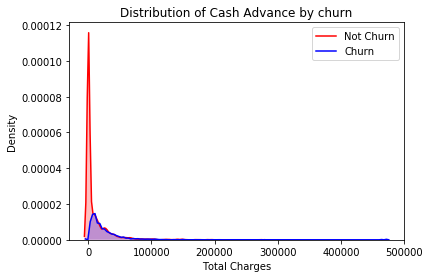

In [92]:
ax = sns.kdeplot(df2.CashAdvance[(df2["Attrited"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.CashAdvance[(df2["Attrited"] ==0) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Cash Advance by churn')

In [95]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Attrited'].values
X = df_dummies.drop(columns = ['Attrited'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [96]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\AnupamaRatha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7780260707635009


AxesSubplot(0.125,0.125;0.775x0.755)


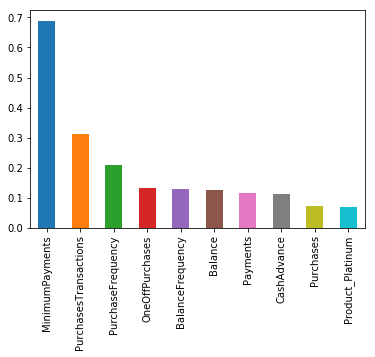

In [99]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


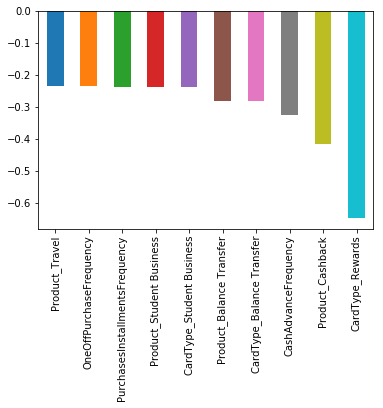

In [100]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

 Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7770949720670391


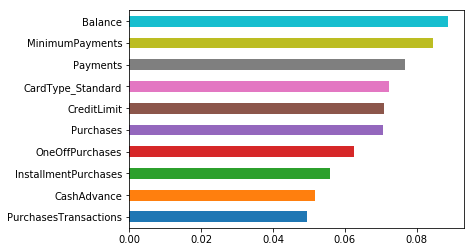

In [102]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

 Support Vecor Machine (SVM)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [104]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7832402234636872

In [105]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[1402    0]
 [ 388    0]]



Wth SVM I was able to increase the accuracy to upto 82%.
However, we need to take a deeper look at the true positive and true negative rates, including 
he Area Under the Curve (AUC) for a better prediction. I will explore this soon. Stay Tuned!


ADA Boost


In [106]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7821229050279329

XG Boost

In [107]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7821229050279329